<a href="https://colab.research.google.com/github/pranscript/ml_coursework/blob/master/Homework_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.cluster import KMeans
from scipy import spatial
%matplotlib inline

In [2]:
from google.colab import files
train = files.upload()

Saving college.csv to college.csv


In [3]:
train_df = pd.read_csv(io.BytesIO(train['college.csv']))
train_df

,Team,# wins in Season 2016(x-axis),# wins in Season 2017(y-axis)
0,X1,3,5
1,X2,3,4
2,X3,2,8
3,X4,2,3
4,X5,6,2
5,X6,6,4
6,X7,7,3
7,X8,7,4
8,X9,8,5
9,X10,7,6


In [0]:
class K_Means:
  def __init__(self, k, tolerance = 0.0001, max_iterations = 500,):
    self.k = k
    self.tolerance = tolerance
    self.max_iterations = max_iterations

  def fit(self, data, manhatten_1, flag):
    self.centroids = manhatten_1
    self.flag= flag
    
    for i in range(self.max_iterations):
      self.classes = {}
      for i in range(self.k):
        self.classes[i] = []
      for features in data:
        distances=0
        if self.flag==0 or self.flag==1 or self.flag==2:
          distances = [spatial.distance.cityblock(features,self.centroids[centroid]) for centroid in self.centroids]
        elif self.flag==3:
          distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
        
        classification = distances.index(min(distances))
        self.classes[classification].append(features)
  
      previous = dict(self.centroids)
        
      for classification in self.classes:
        self.centroids[classification] = np.average(self.classes[classification], axis = 0)
        
      isOptimal = True
        
      for centroid in self.centroids:
        original_centroid = previous[centroid]
        curr = self.centroids[centroid]
        
        if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
          isOptimal = False
          
      if isOptimal:
        break

Centroids (4,6) - (5,4) - Distance metric = Manhatten


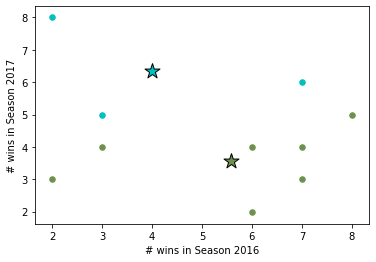

Centroids (3,3) - (8,3) - Distance metric = Manhatten


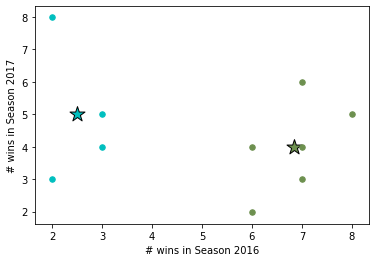

Centroids (3,2) - (4,8) - Distance metric = Manhatten


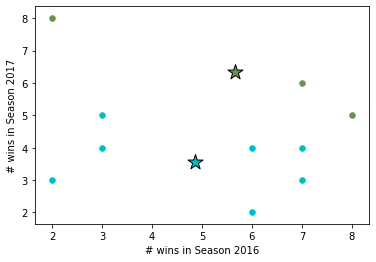

Centroids (4,6) - (5,4) - Distance metric = Euclidean


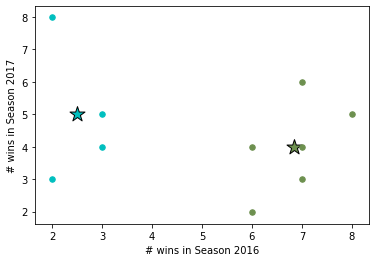

In [7]:
def main():
  X = train_df.iloc[:,1:].values
  manhatten_1 = {0:np.array([4,6]),1:np.array([5,4])}
  manhatten_2 = {0:np.array([3,3]),1:np.array([8,3])}
  manhatten_3 = {0:np.array([3,2]),1:np.array([4,8])}
  euclidean = {0:np.array([4,6]),1:np.array([5,4])}
  km = K_Means(2)
  labels=[]
  for i in range(0,4):
    if i==0:
      print('Centroids (4,6) - (5,4) - Distance metric = Manhatten')
      km.fit(X,manhatten_1,i)
    elif i==1:
      print('Centroids (3,3) - (8,3) - Distance metric = Manhatten')
      km.fit(X,manhatten_2,i)
    elif i==2:
      print('Centroids (3,2) - (4,8) - Distance metric = Manhatten')
      km.fit(X,manhatten_3,i)
    elif i==3:
      print('Centroids (4,6) - (5,4) - Distance metric = Euclidean')
      km.fit(X,euclidean,i)
    #print(labels)
    plt.figure()
    plt.xlabel("# wins in Season 2016")
    plt.ylabel("# wins in Season 2017")
    colors = 10*["c", "#6d904f"]
    for centroid in km.centroids:
      color = colors[centroid]
      plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1],s = 250,marker = "*",color=color,edgecolor='black')
    
    for classification in km.classes:
      color = colors[classification]
      for features in km.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)
    plt.show()
if __name__ == "__main__":
	main()